# TP d'introduction à NetworkX

**N.B.**: les commandes de la cellule suivante permettent d'afficher tous les résultats d'une cellule, et pas uniquement le dernier. Ce qui nous dispense d'utiliser print().

In [2]:
# affiche tous les résultats d'une cellule, et pas uniquement le dernier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## I)  Création de graphe

Dans la suite, vous aurez besoin des packages `networkx`, `matplotlib` et `scipy`. Installez-les à l'aide de la commande `pip install tel_package` (dans un terminal) si vous ne les avez pas sur votre machine.   
En règle générale, si un message dit que tel package n'a pas été trouvé, on utilise **pip** pour l'installer puis on évite de refaire l'installation plus tard.

### I.1- Création d'un graphe simple

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

graphe_simple = nx.Graph()
graphe_simple.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 4), 
                         (4, 5), (4, 6), (5, 7), (5, 8), (7, 8)]) 

###  Et dessiner le graphe  avec **draw**

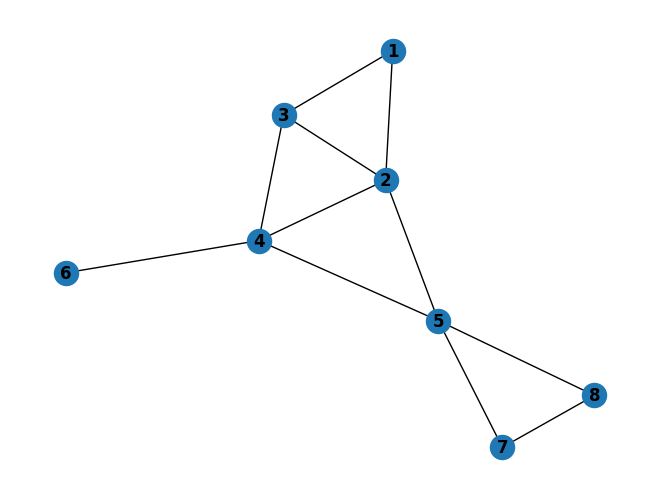

In [10]:
# Dessiner le graphe avec les noms/numéros des noeuds (with_labels=True)
nx.draw(graphe_simple, with_labels=True, font_weight='bold') 

### I.2- Dessiner le même graphe  avec **plot**

<Figure size 900x1200 with 0 Axes>

<AxesSubplot: >

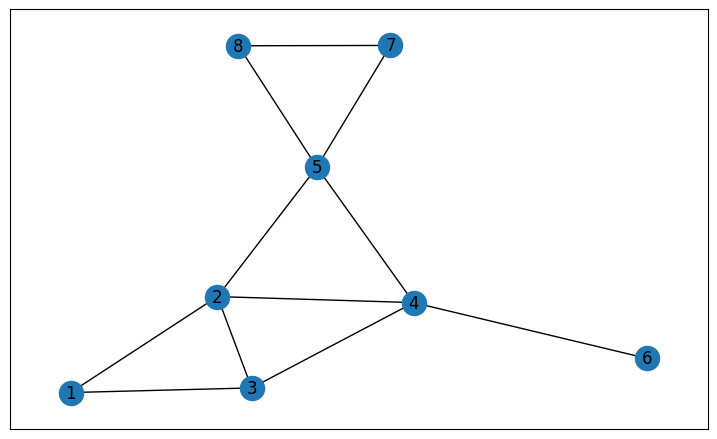

In [7]:
# Gestion de l'affichage par plot
plt.figure(figsize =(9, 12))
plt.subplot(211)
nx.draw_networkx(graphe_simple)

N.B. : on constate une différence dans les 2 affichages dûe à la part aléatoire de placement des noeuds par Networkx.

### I. 3 - Création et dessin d'un graphe orienté (et non connexe)

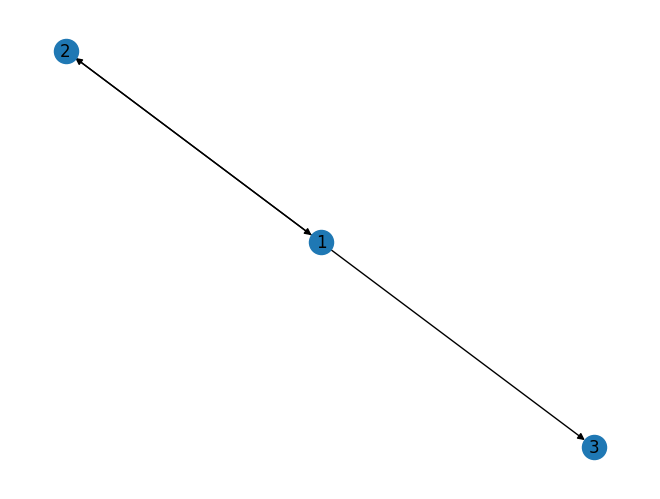

In [8]:
graphe_oriente = nx.DiGraph()  # Digraph : Directed Graph
graphe_oriente.add_edge(1, 2)  # Ajout d'une arête
graphe_oriente.add_edges_from([(1, 2),(1,3),(2,1)]) # Ajout d'une liste d'arêtes
nx.draw(graphe_oriente, with_labels=True)

On ajoute d'autres éléments à ce graphe

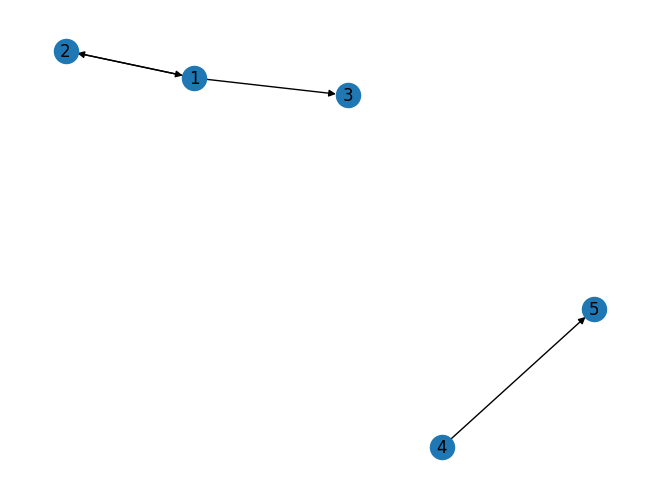

In [9]:
# On ajoute d'autres éléments
graphe_oriente.add_node(5)
graphe_oriente.add_nodes_from([3,4]) # 3 y est déjà
graphe_oriente.add_edge(4, 5) # Cet ajout transforme graphe_oriente en non connexe
nx.draw(graphe_oriente, with_labels=True)

Remarquez que ce graaphe reste non connexe

#### **Voir** d'autres exemples dans la partie **Adddendum** en bas de ce fichier.

## Problème du mariage stable à l'aide du graphe Matching

{1: 'A', 2: 'C', 3: 'B', 4: 'D', 'D': 4, 'B': 3, 'C': 2, 'A': 1}

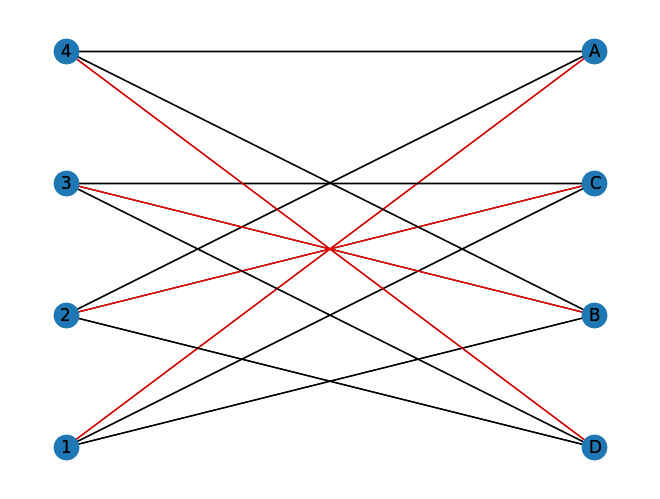

In [11]:
B = nx.Graph()  # Initialise graph
top_nodes = [1, 2,3,4]
bottom_nodes = ["A", "B", "C", "D"]
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "A"), (1, "B"), (1, "C"), (2, "C"), (2, "A"), (2, "D")])
B.add_edges_from([(3, "B"), (3, "D"), (3, "C"), (4, "B"), (4, "A"), (4, "D")])
top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)
nx.draw(B, with_labels='True', pos=pos)
#Obtain the maximum cardinality matching
# A matching or independent edge set in an undirected graph is a set of edges without common vertices.
my_matching = nx.bipartite.matching.hopcroft_karp_matching(B, top_nodes)
my_matching

# repasser les couples établis en couleur rouge.
edges_of_matching=[(k,v) for k,v in my_matching.items()]
edge_colors = ["red" if edge in edges_of_matching else "black" for edge in B.edges()]
nx.draw(B, pos=pos, edge_color=edge_colors, with_labels=True)
#plt.show()

## Quelques manipulations:
### I. 4 - suppression des noeuds dans un graphe

D'abord, créons un graphe 

[(0, 1), (1, 2), (2, 3), (3, 4)]

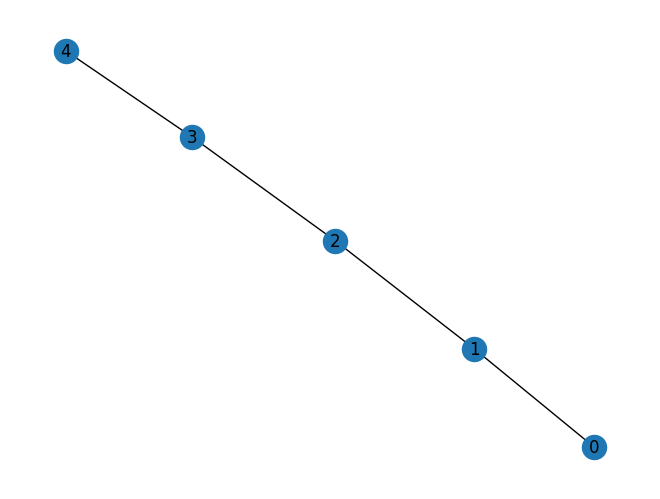

In [12]:
path_graphe = nx.path_graph(5)  # ou DiGraph, MultiGraph, MultiDiGraph, etc
list(path_graphe.edges)
nx.draw(path_graphe, with_labels=True)

Puis on enlève des noeuds

[(2, 3), (3, 4)]

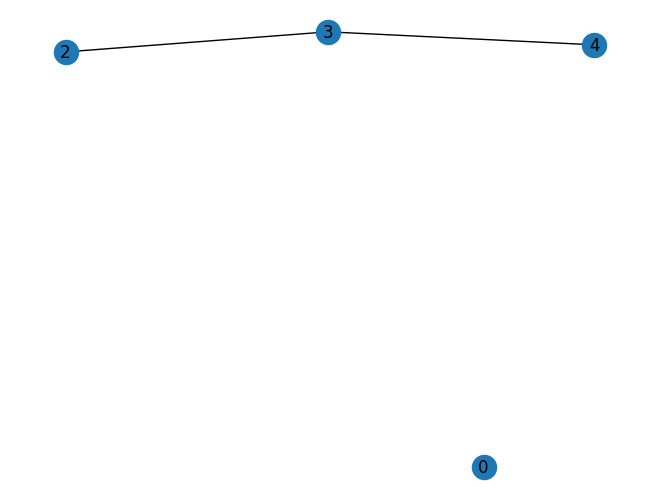

In [13]:
path_graphe.remove_node(1)
list(path_graphe.edges)
nx.draw(path_graphe, with_labels=True)

Puis on enlève des arêtes

[(3, 4)]

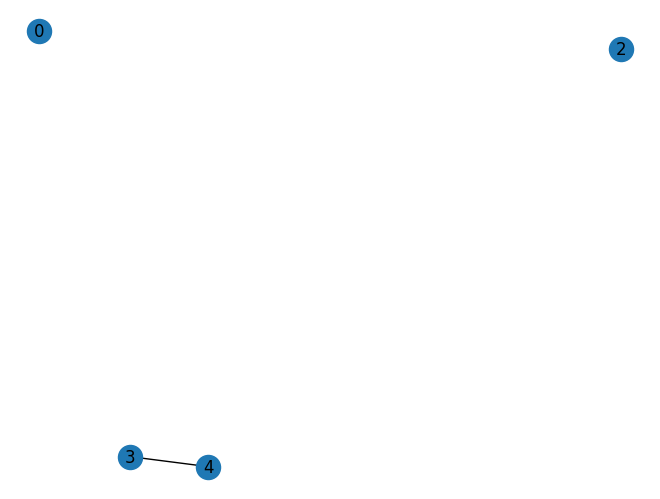

In [14]:
# Enlever l'aroete (2,3)
e = (2,3)
path_graphe.remove_edge(*e)

# Ce qui reste
list(path_graphe.edges)
nx.draw(path_graphe, with_labels=True)

## Sous graphes :
### I.5- Un sous graphe de graphe_simple

<AxesSubplot: >

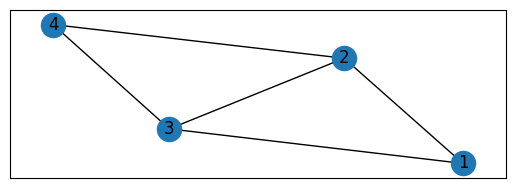

In [15]:
sous_graphe = graphe_simple.subgraph([1, 2, 3, 4])
# [1, 2, 3, 4] est un sous ensemble des noeuds de graphe_simple
  
plt.subplot(212)
nx.draw_networkx(sous_graphe)

---

## II) Graphe d Petersen

networkX est capable de produire un graphe de Petersen (sous forme de shell=escargot)

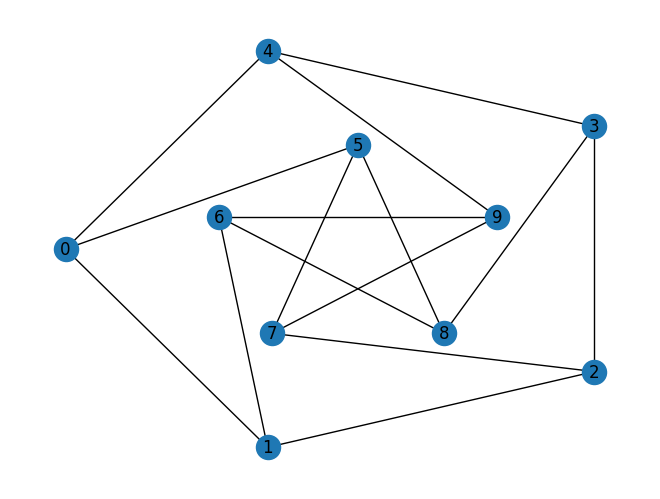

In [16]:
graphe_petersen = nx.petersen_graph()
#nx.draw_networkx(graphe_petersen)

pos = nx.shell_layout(graphe_petersen, nlist=[range(1,6), range(6,11)])

nx.draw_shell(graphe_petersen, nlist=[range(5,10), range(5)],with_labels=True)

#### II.1-  Créons le même graphe de Petersen en donnant **explicitement** la liste de ses arêtes

In [17]:
graphe_simple2 = nx.Graph()
graphe_simple2.add_edges_from([(1,3), (1,4), (1,6), (2,4), (2,5), (2,7), (3,5), (3,8), (4, 9), (5, 10), (6,7), (6,10), (7,8), (8,9), (9, 10)])

#### II.2-   Affichage du graphe créé, en indiquant les numéros de sommets en gras

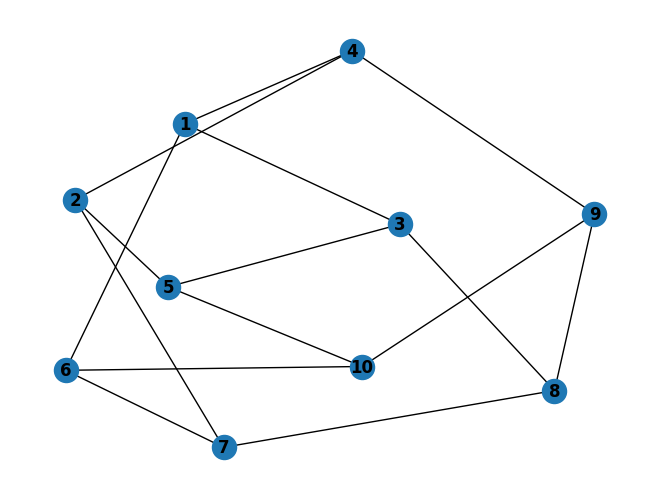

In [18]:
nx.draw(graphe_simple2, with_labels=True, font_weight='bold')

Par défaut, les sommets sont disposés de manière **aléatoire**, ce qui ne facilite pas la lecture des graphes ayant une structure régulière, comme le graphe de **Petersen**. 

A l'occasion, cherchez dans la documentation de NetworkX une autre fonction permettant d'afficher ce graphe sous une forme plus "classique".

#### II.3-   Affichage du graphe de manière "symétrique"

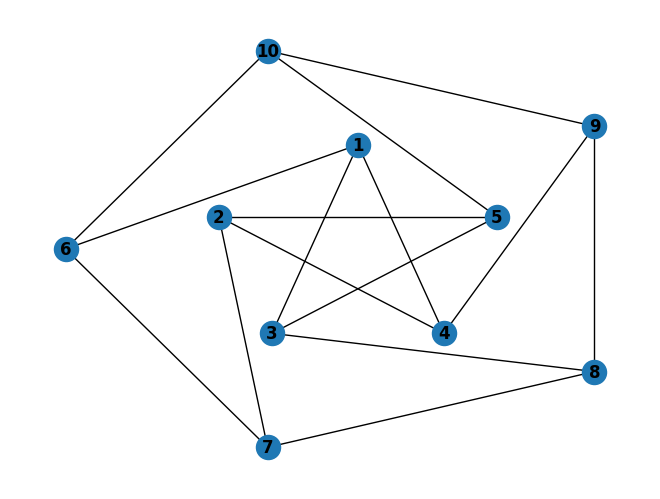

In [19]:
nx.draw_shell(graphe_simple2, nlist=[range(1,6), range(6,11)], with_labels=True, font_weight='bold')

## III) Quelques fonctions / propriétés 

## III.1 - Quelques fonctions utiles de NetworkX
Les méthodes suivantes permettent d’accéder aux attributs du graphe et fournissent les primitives essentielles :

- g.degree() : degrés des sommets du graphe g
- g.number_of_nodes() : nombre de sommets du graphe g
- g.number_of_edges() : nombre d’arcs du graphe g
- g.predecessors(i) : liste des prédecesseurs du sommet i
- g.successors(i) : liste des successeurs du sommet i
- g.neighbors(i) : liste des voisins du sommet i
    On dispose aussi des indicateurs et outils suivants (liste non exhaustive) :

- density(g) : densité du graphe g (voir ci-dessous)
- diameter(g) : diamètre du graphe g
- shortest_path(g) : plus courts chemins entre tous les couples de sommets de g
- pagerank(g) : calcul du pagerank 

## III.2 - Propriétés des graphes : quelques définitions

- **densité** : la **densité** d'un graphe est  le rapport entre le nombre d'arêtes (ou d'arcs) divisé par le nombre d'arêtes (ou d'arcs) possibles.

- Pour un graphe $G=(V, E)$ avec $|V|$ noeuds (sommets) et $|E|$ arêtes, la densité permet de savoir si $G$ possède beaucoup d'arêtes ou non. 

- Dans le cas d'un graphe non orienté simple ${\displaystyle G=(V,E)}$, la densité est le rapport ${\displaystyle D={\frac {2\ |E|}{|V|\cdot (|V|-1)}}}$


- Un **graphe  dense** est un graphe dans lequel le nombre d'arêtes (ou d'arcs) est proche du nombre maximal ($V^2$). 
Un **graphe creux** (_sparse_) a au contraire peu d'arêtes. 
- La densité 0 correspond au graphe où tous les sommets sont isolés (pas d'arête entre les noeuds).

- Un **graphe complet** : la densité 1 correspond à un  graphe dit **complet**. 
Un graphe complet est un graphe simple dont tous les sommets sont adjacents deux à deux. 
- Un graphe orienté est _complet_ si chaque paire de sommets est reliée par exactement deux arcs (un dans chaque sens).

### Exemple d'un graphe complet :

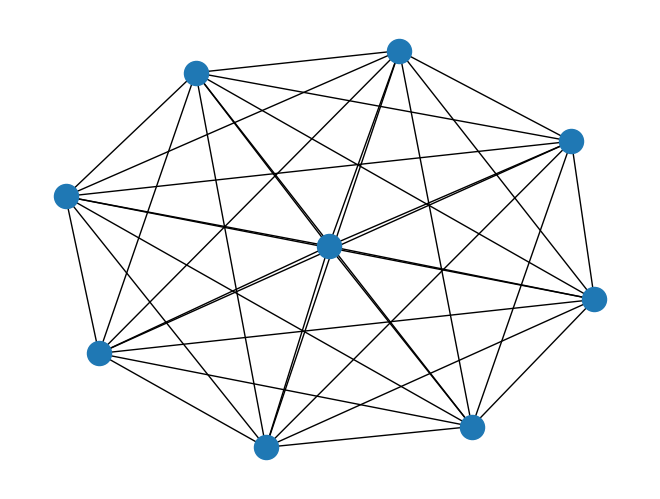

In [20]:
G_complet1 = nx.complete_graph(9)
nx.draw(G_complet1)

Pour un graphe **complet** $G=(V, E)$ avec $|V|$ sommets, le nombre d'arêtes est donné par
$\hspace{3cm} {\displaystyle |E| = \sum _{{i=1}}^{{|V|}}\left(|V|-i\right)=\sum _{{i=1}}^{{|V|-1}}i={\frac  {|V|\ (|V|-1)}{2}}}$


- On obtient le même résultat  en considérant le nombre d’arêtes $|E|$ comme le nombre de couples distincts que l’on peut former avec ${\displaystyle |V|}$ noeuds, soit ${\displaystyle {\binom  {|V|}{2}}}$ arêtes, ce qui vaut bien ${\displaystyle {\dfrac {|V| \ (|V|-1)}{2}}}$


- **Nombre chromatique** $k$ d'un graphe est le nombre **chromatique** ($k$= nombre de couleurs nécessaires pour colorer les noeuds tel que 2 noeuds adjacents n'ont pas la même couleur).
- Pour un graphe _complet_, le nombre chromatique $k$ est égal au nombre de noeuds  $|V|$.

- Un **graphe régulier** est un graphe où tous les sommets ont le même nombre de voisins, c'est-à-dire le même **degré** ou **valence**. Un graphe régulier dont les sommets sont de degré $k$ est appelé un graphe **k-régulier** ou graphe régulier de degré $k$.

## III.3 - Matrice d'adjacence
- La matrice sysmétrique ($noeuds \times noeuds$).

## III.4 - Matrice d'incidence

C'est une matrice (0,1) avec une ligne par noeud et une colonne par arête.
- On met (v,e)=1 ssi le noeud v est  incident suivant edge e 
- N.B. : parfois, la matrice d'incidence est présentée comme la transposé de le définition ci-dessus avec une colonne pour chaque noeud et une ligne par edge.
- Il y a un lien entre la matrice d'incidence $C$ et la matrice d'adjacence $L$ :

$\hspace{2cm} {\displaystyle L=C^t C-2I}$,  où  $I$ est une matrice d'identité .
## III.5 - Exemples des matrices d'incidence :

![graphe ?](Image.png)

#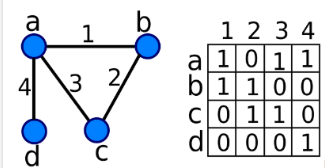

### Même chose à l'aide de Networkx :
A l'aide de Networkx, on peut trouver la matrice d'incidence du graphe ci-dessus (graphe_simple2)

In [22]:
import numpy as np
M = nx.incidence_matrix(graphe_simple2).toarray()
M

/tmp/ipykernel_3542/2112871273.py:2: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  M = nx.incidence_matrix(graphe_simple2).toarray()


array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.]])

In [465]:
# Petite remarque :
# Une autre façon d'insérer une image
#from IPython.display import Image
#from IPython.core.display import HTML 
#Image(filename = "./Fig-Graphe-Complet.png", width=100, height=100)

## IV) Exercices 1 :
Pour les questions qui suivent, donnez la réponse en utilisant les fonctions de **NetworkX**

On rappelle le graphe construit ci-dessus :

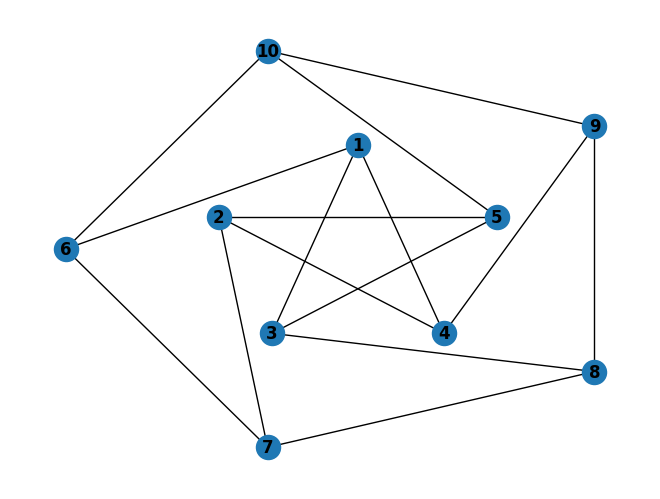

In [23]:
nx.draw_shell(graphe_simple2, nlist=[range(1,6), range(6,11)], with_labels=True, font_weight='bold')

Le "contenu" du même graphe décrit sous forme de dict of dict :
- Pour chaque noeud, on a les voisins donnés sous forme de dict.
- Par exemple, 
    1: {3: {}, 4: {}, 6: {}}
nous dit que le noeud 1 a pour voisins les noeuds  [3,4,6], ces voisins sont décrits à leur tour dans le dico principal.

In [24]:
nx.to_dict_of_dicts(graphe_simple2)

{1: {3: {}, 4: {}, 6: {}},
 3: {1: {}, 5: {}, 8: {}},
 4: {1: {}, 2: {}, 9: {}},
 6: {1: {}, 7: {}, 10: {}},
 2: {4: {}, 5: {}, 7: {}},
 5: {2: {}, 3: {}, 10: {}},
 7: {2: {}, 6: {}, 8: {}},
 8: {3: {}, 7: {}, 9: {}},
 9: {4: {}, 8: {}, 10: {}},
 10: {5: {}, 6: {}, 9: {}}}

## IV.1 - Ce graphe est-il orienté ou non orienté ?

In [28]:
graphe_simple2.is_directed()

False

## IV.2 - Quels sont ses sommets et ses arêtes ?

In [29]:
graphe_simple2.nodes
graphe_simple2.edges

NodeView((1, 3, 4, 6, 2, 5, 7, 8, 9, 10))

EdgeView([(1, 3), (1, 4), (1, 6), (3, 5), (3, 8), (4, 2), (4, 9), (6, 7), (6, 10), (2, 5), (2, 7), (5, 10), (7, 8), (8, 9), (9, 10)])

## IV.3 - Quels sont les voisins du sommet 2 ? Quel est le degré du sommet 10 ?

In [30]:
list(graphe_simple2.neighbors(2))
graphe_simple2.degree(10)

[4, 5, 7]

3

## IV.4 - Ce graphe est-il régulier ?

- Rappel : dans un graphe régulier, tous les sommets ont le même nombre de voisins (le même **degré** ou la même **valence**). Un graphe régulier dont les sommets sont de degré $k$ est appelé un graphe **k-régulier** ou graphe régulier de degré $k$.

In [31]:
d = list(graphe_simple2.degree)
d # ou print(d) si l'option InteractiveShell.ast_node_interactivity = "all" n'est pas donnée.

# Le dégré du 1er noeud (noeud 1)
"degré du noeud 1" , d[0][1]

# Vérification (par soi) de la régularité : est-ce que tous les noeuds ont le même degré
"test manuel", all(elem[1] == d[0][1] for elem in d)

# Demandez à networkX !
"test par networkX", nx.is_regular(graphe_simple2)

[(1, 3),
 (3, 3),
 (4, 3),
 (6, 3),
 (2, 3),
 (5, 3),
 (7, 3),
 (8, 3),
 (9, 3),
 (10, 3)]

('degré du noeud 1', 3)

('test manuel', True)

('test par networkX', True)

## IV.5 - Donnez sa matrice d’incidence et sa matrice d’adjacence

In [32]:
# Sans passer par "todense", les affichages sont inéfficaces !
nx.incidence_matrix(graphe_simple2).todense()
nx.adjacency_matrix(graphe_simple2).todense()

/tmp/ipykernel_3542/471675443.py:2: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.incidence_matrix(graphe_simple2).todense()


array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.]])

/tmp/ipykernel_3542/471675443.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(graphe_simple2).todense()


matrix([[0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 1, 0, 0, 1, 0]])

## IV.6- Quel est le sous-graphe induit par les sommets {6, 3, 7, 8, 1, 5} ?

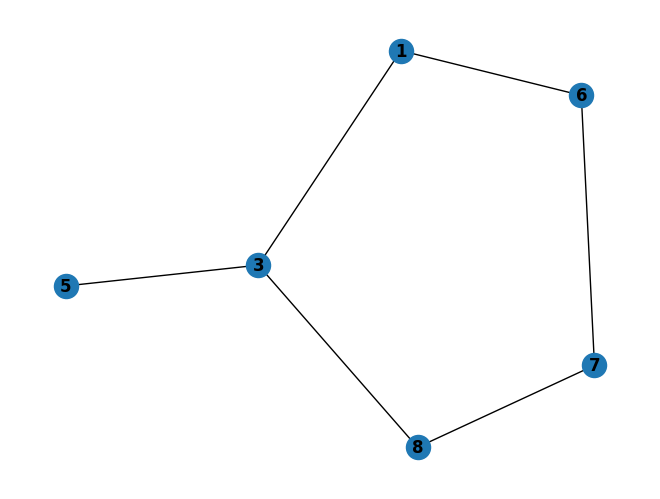

In [33]:
subG = graphe_simple2.subgraph([6, 3, 7, 8, 1, 5])
nx.draw(subG, with_labels=True, font_weight='bold')

## V)  Graphe de Petersen et le circuit Hamiltonien 

**Reprenons l'exemple de graph de Petersen ci-dessus**

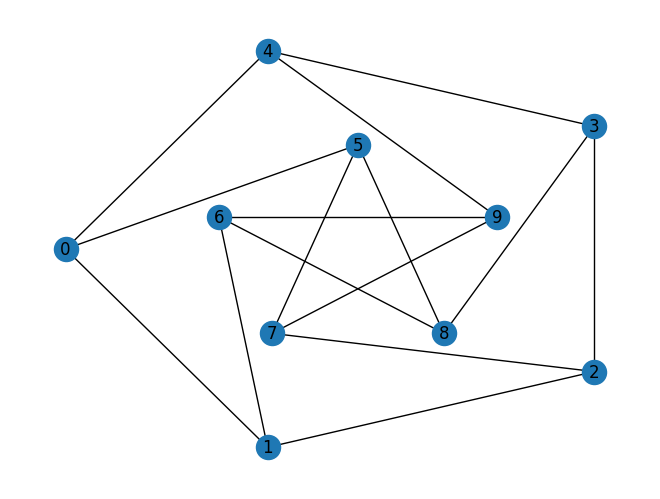

In [34]:
G = nx.petersen_graph()
#nx.draw_networkx(G)

pos = nx.shell_layout(G, nlist=[range(1,6), range(6,11)])

nx.draw_shell(G, nlist=[range(5,10), range(5)],with_labels=True)

## V.1- Exercice : Hamilton
En revenant à notre graphe G, mettez en évidence (avec des arêtes rouges) un chemin hamiltonien (calculé à la main) sur le graphe de Petersen

(-1.1899468103051185,
 0.9989640513062478,
 -1.1507783287763595,
 1.15077820956707)

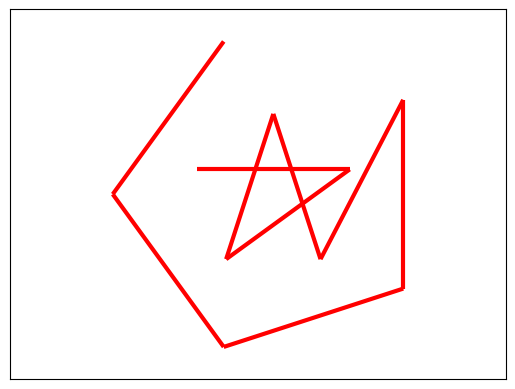

In [35]:
ham_path = [(10,6), (6,7), (7,8), (8,9), (9,4), (4,1), (1,3), (3,5), (5,2)]

# ancienne version de networkX : nx.draw_networkx_edges(G,pos,edgelist=list(set(G.edges) - set(ham_path)),edge_color='black',width=1)
nx.draw_networkx_edges(G,pos,edgelist=ham_path,edge_color='r',width=3)
plt.axis('equal')
#plt.show()

Et avec le graphe d'origine :

(-1.1899468103051185,
 0.9989640513062478,
 -1.1507783287763595,
 1.15077820956707)

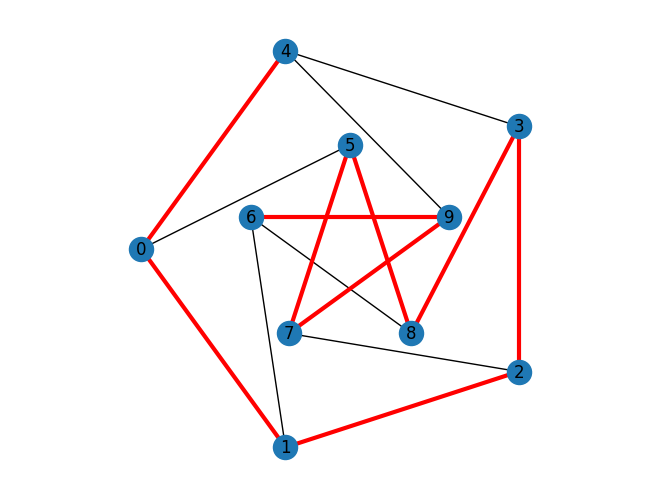

In [36]:
G = nx.petersen_graph()


pos = nx.shell_layout(G, nlist=[range(1,6), range(6,11)])

nx.draw_shell(G, nlist=[range(5,10), range(5)],with_labels=True)
ham_path = [(10,6), (6,7), (7,8), (8,9), (9,4), (4,1), (1,3), (3,5), (5,2)]

# ancienne version de networkX : nx.draw_networkx_edges(G,pos,edgelist=list(set(G.edges) - set(ham_path)),edge_color='black',width=1)
nx.draw_networkx_edges(G,pos,edgelist=ham_path,edge_color='r',width=3)
plt.axis('equal')
#plt.show()

## VI) Exercices 2
### VI.a) 
~~Avant de voir comment fait-on avec NorworkX (ci-dessous, en VI.d)~~, écrivez une fonction `parcoursLargeur` qui prend en paramètres un graphe `G` et un sommet `s`, et qui retourne l'ordre de parcours en largeur de `G` quand on part de `s` (on supposera que `G` est connexe, et qu'on traite les sommets par ordre croissant)


[0, 4, 5, 7, 1, 6, 8, 9, 2, 3]


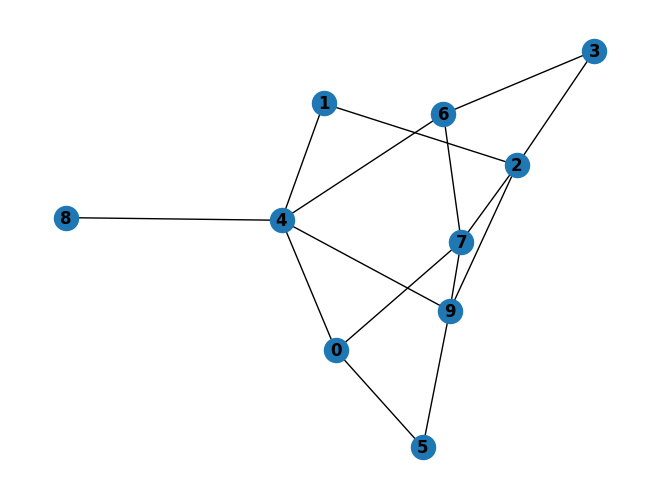

In [37]:
# Ordre croissant
def parcoursLargeur1(G, s):
    file = [s]
    sortie = []
 
    # On effectue le parcours BFS
    while file:
        u = file.pop(0)
        sortie.append(u)
        voisins=[v for v in list(G.neighbors(u)) if v not in file and v not in sortie]
        # Parcours dans l'ordre croissant
        file.extend(sorted(voisins))
    
    return sortie

graphe_simple = nx.Graph()
graphe_simple.add_nodes_from([1, 2])
while not nx.is_connected(graphe_simple):
    graphe_simple = nx.gnm_random_graph(10, 15)
nx.draw(graphe_simple, with_labels=True, font_weight='bold')

print(parcoursLargeur1(graphe_simple, list(graphe_simple.nodes())[0]))

####  Une autre solution : la même chose d'une autre manière 

[0, 4, 5, 7, 1, 6, 8, 9, 2, 3]


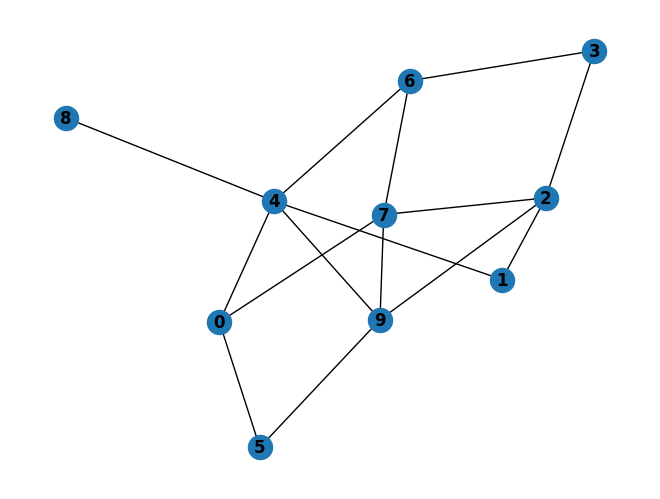

In [38]:
def parcoursLargeur2(G):
    sommets = list(G.nodes)
    sortie = []

    # On effectue le parcours BFS
    while sommets:
        file = [sommets[0]]
        while file:
            u = file.pop(0)
            sortie.append(u)
            sommets.remove(u)
            voisins=[v for v in list(G.neighbors(u)) if v not in file and v not in sortie]
            # Parcours dans l'ordre croissant
            file.extend(sorted(voisins))
    
    return sortie

nx.draw(graphe_simple, with_labels=True, font_weight='bold')
print(parcoursLargeur2(graphe_simple))

#### La même chose encore d'une autre manière (et avec un autre graphe)

[[0, 5, 4, 7, 9, 6, 8, 1, 2, 3]]


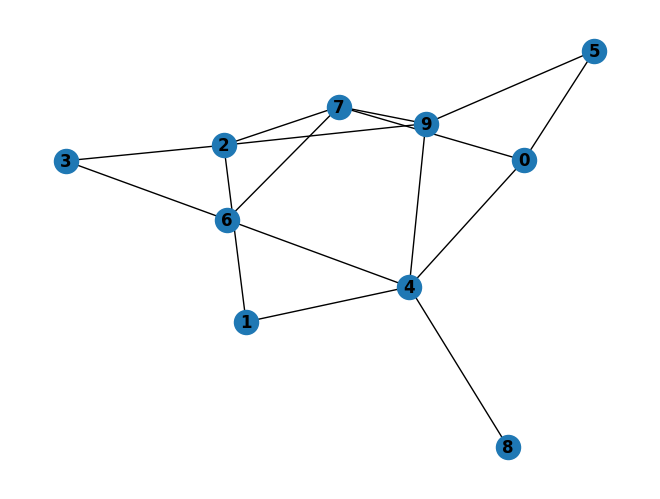

In [39]:
def parcoursLargeur3(G):
    sommets = list(G.nodes)
    sortie = []
    
    # On effectue le parcours BFS
    while sommets:
        file = [sommets[0]]
        compconn = []
        while file:
            u = file.pop(0)
            compconn.append(u)
            sommets.remove(u)
            file.extend([v for v in list(G.neighbors(u)) if v not in file and v not in compconn])
                    
        sortie.append(compconn)
                
    return sortie

nx.draw(graphe_simple, with_labels=True, font_weight='bold')
print(parcoursLargeur3(graphe_simple))

### VI.b) 
Modifiez la fonction précédente pour qu'elle démarre le parcours par le plus petit sommet, et retourne l'ordre de parcours en largeur même si `G` n'est pas connexe

On va créer à la main un graphe non connexe (simplement, on ne relie pas certain couples de noeud).

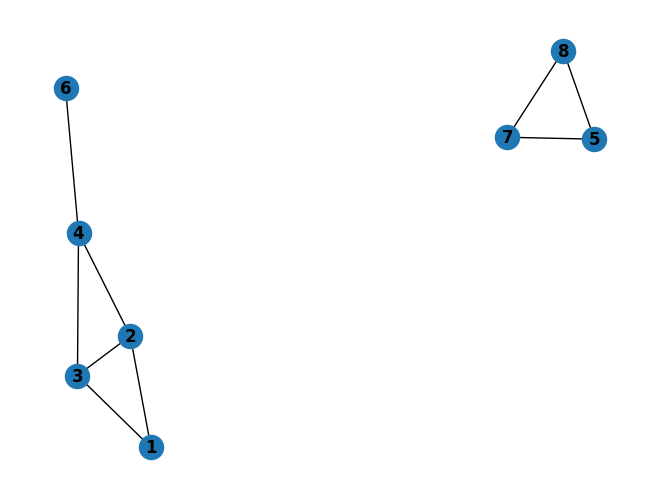

In [40]:
graphe_simple3 = nx.Graph()
graphe_simple3.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4),  (3, 4), 
                          (4, 6), (5, 7), (5, 8), (7, 8)])
nx.draw(graphe_simple3, with_labels=True, font_weight='bold') 

**Le parcours en largeur**

In [41]:
print(parcoursLargeur1(graphe_simple3, 1))  

[1, 2, 3, 4, 6]


### Testons sur graphe non connexe
On va utiliser la fonction _nx.random_clustered_graph()_ de networkX pour créer un graphe non connexe.

[0, 3, 5, 1, 6, 7]


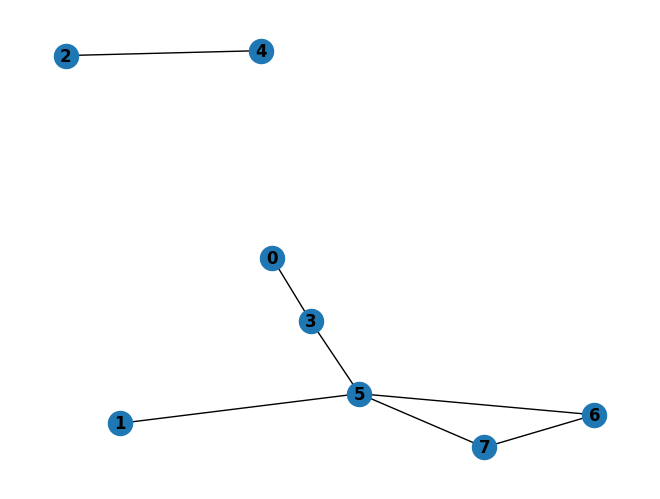

In [46]:
# On crée un graphe non connexe (voir la cellule suivante pour la doc)
deg = [(1, 0), (1, 0), (1, 0), (2, 0), (1, 0), (2, 1), (0, 1), (0, 1)]
graphe_random_cluster = nx.random_clustered_graph(deg)
nx.draw(graphe_random_cluster, with_labels=True, font_weight='bold')

print(parcoursLargeur1(graphe_random_cluster, list(graphe_random_cluster.nodes())[0])) # list(graphe_random_cluster.nodes())[0] = Le noeud 0

### Extrait de la documentation  sur le graphe généré (la doc networkx):
**random_clustered_graph(joint_degree_sequence, create_using=None, seed=None)**

Generate a random graph with the given joint independent edge degree and triangle degree sequence.

This uses a configuration model-like approach to generate a random graph (with parallel edges and self-loops) by randomly assigning edges to match the given joint degree sequence.

The joint degree sequence is a list of pairs of integers of the form . According to this list, vertex  is a member of  triangles and has  other edges. The number  is the triangle degree of  and the number  is the independent edge degree.

Parameters
joint_degree_sequence : list of integer pairs
Each list entry corresponds to the independent edge degree and triangle degree of a node.

create_using : NetworkX graph constructor, optional (default MultiGraph)
Graph type to create. If graph instance, then cleared before populated.

seed : integer, random_state, or None (default)
Indicator of random number generation state. See Randomness.

Returns : a MultiGraph

A graph with the specified degree sequence. Nodes are labeled starting at 0 with an index corresponding to the position in deg_sequence.

## VI.c) 
Utilisez la fonction précédente pour écrire une fonction `compConnexesL` qui prend en paramètres un graphe `G`, et qui retourne la liste des composantes connexes de G (sous la forme d'une liste de listes)

In [51]:
from collections import deque

def compConnexesL(G):
    sommets = deque(G.nodes)
    composants_connexes = []
    while len(sommets) != 0:
        sommet = sommets.popleft()
        res = parcoursLargeur1(G, sommet)
        for s in res:
            if (s in sommets):
                sommets.remove(s)
        composants_connexes.append(res)
    return composants_connexes

compConnexesL(graphe_random_cluster)

[[0, 3, 5, 1, 6, 7], [2, 4]]

### Solution  (indication) : 
- Créer L = la liste des noeuds
- Liste_composantes_connexes = vide
- Répéter
    - Lancez un parcours en largeur avec le 1er noeud (le plus petit) de L et récupérer la liste L1 des noeuds empruntés.
        Pour un graphe non connexe, L1 est différente (incluse dans) L.
    - L1 sera un des composantes connexe : ajouter L1 à Liste_composantes_connexes
    - Choisir un noeud N dans L2 = L - L1 (la différence entre L et L1)
    - Si L2 != vide alors L=L2
- Jussqu'à L=vide
- Liste_composantes_connexes est la solution

### VI.d) Solutions avec networkX : recherche de composantes connexes

In [52]:
compos_connexes_graphe_simple=nx.connected_components(graphe_simple)
resultat_graphe_simple=list(compos_connexes_graphe_simple) # On save sinon le générateur oublie les valeurs ?
resultat_graphe_simple

# La taille des composantes
[len(c) for c in sorted(resultat_graphe_simple, key=len, reverse=True)]

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}]

[10]

#### Même chose avec le graphe 'graphe_random_cluster' créé ci-dessus

In [53]:
list(nx.connected_components(graphe_random_cluster))

[{0, 1, 3, 5, 6, 7}, {2, 4}]

#### Récupérer les composantes et donner leur taille

In [54]:
compos_connexes=list(nx.connected_components(graphe_random_cluster))
compos_connexes

# La taille des composantes
[len(c) for c in sorted(compos_connexes, key=len, reverse=True)]

[{0, 1, 3, 5, 6, 7}, {2, 4}]

[6, 2]

## VII) Exercices 3
### VII.a) 
Ecrivez une fonction `parcoursProfondeur` qui prend en paramètres un graphe `G` et un sommet `s`, et qui retourne l'ordre de parcours en profondeur de `G` quand on part de `s` (on supposera que `G` est connexe, et qu'on traite les sommets par ordre croissant)

### VII.b)  
Modifiez la fonction précédente pour qu'elle démarre le parcours par le plus petit sommet, et retourne l'ordre de parcours en largeur même si `G` n'est pas connexe

### VII.c)  
Utilisez la fonction précédente pour écrire une fonction `compConnexesP` qui prend en paramètres un graphe `G`, et qui retourne la liste des composantes connexes de G (sous la forme d'une liste de listes)

~~Voir en VII. b) ci-dessous les mêmes fonction savec NetworkX.~~

[0, 4, 1, 2, 3, 6, 7, 9, 5, 8]


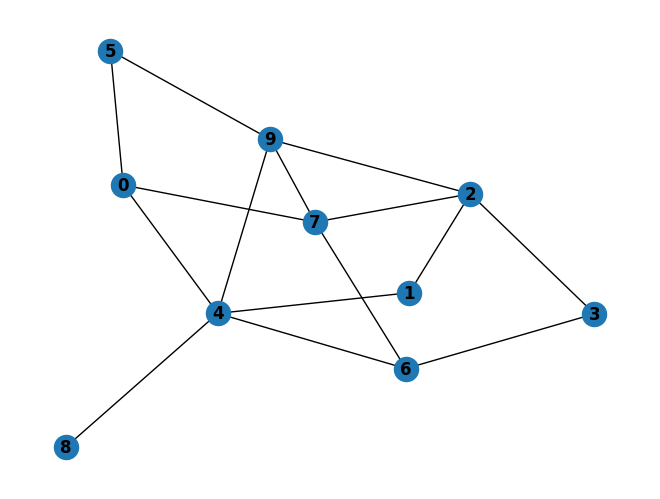

In [55]:
# On marque les sommets au fur et à mesure de leur insertion dans la pile
def parcoursProfondeur1(G, s):
    pile = [s]
    sortie = [s]
 
    # On effectue le parcours DFS
    while pile:
        sommet = pile[-1] # on considère toujours le dernier élément de la pile
        voisins = [v for v in list(G.neighbors(sommet)) if v not in pile and v not in sortie]
        voisins.sort()
        if voisins == []:
            pile.pop()
        else:
            pile.append(voisins[0])
            sortie.append(voisins[0])
    
    return sortie
    

nx.draw(graphe_simple, with_labels=True, font_weight='bold')
print(parcoursProfondeur1(graphe_simple, list(graphe_simple.nodes())[0]))

### VII.a bis)  Une variante de l'algorithme
** N.B. ** les conditions d'appel ne sont pas les mêmes (d'où la différence des résultats)

[0, 4, 1, 2, 3, 6, 7, 9, 5, 8]


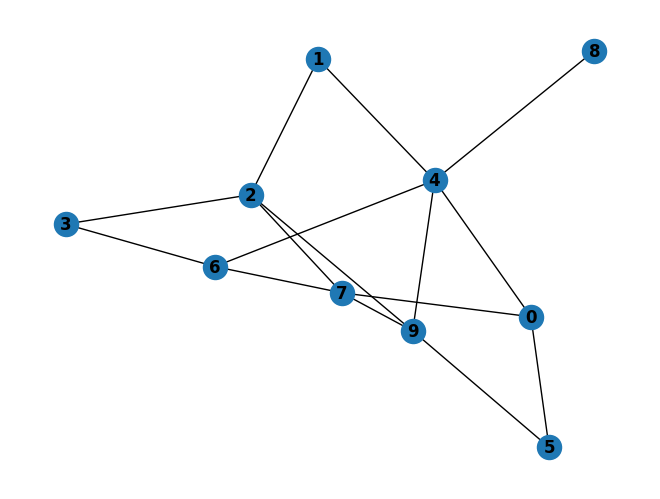

In [56]:
# On marque les sommets au fur et à mesure de leur insertion dans la pile
def parcoursProfondeur2(G):
    sommets = list(G.nodes)
    sortie = []

    # On effectue le parcours DFS
    while sommets:
        pile = [sommets[0]]
        sortie.append(sommets[0])
        sommets.pop(0)
        while pile:
            sommet = pile[-1] # on considère toujours le dernier élément de la pile
            voisins = [v for v in list(G.neighbors(sommet)) if v not in pile and v not in sortie]
            voisins.sort()
            if voisins == []:
                pile.pop()
            else:
                pile.append(voisins[0])
                sortie.append(voisins[0])
                sommets.remove(voisins[0])
    
    return sortie
    
nx.draw(graphe_simple, with_labels=True, font_weight='bold')
print(parcoursProfondeur2(graphe_simple))

### VII.a ter) Une variante de l'algorithme
**N.B.** les conditions d'appel sont les mêmes ici que dans le cas VII.a bis


[[0, 4, 1, 2, 3, 6, 7, 9, 5, 8]]


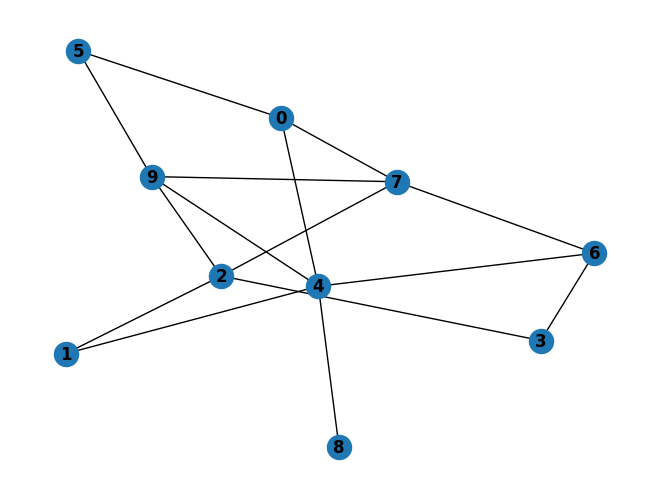

In [57]:
# On marque les sommets au fur et à mesure de leur insertion dans la pile
def parcoursProfondeur3(G):
    sommets = list(G.nodes)
    sortie = []

    # On effectue le parcours DFS
    while sommets:
        pile = [sommets[0]]
        compconn = [sommets[0]]
        sommets.pop(0)
        while pile:
            sommet = pile[-1] # on considère toujours le dernier élément de la pile
            voisins = [v for v in list(G.neighbors(sommet)) if v not in pile and v not in compconn]
            voisins.sort()
            if voisins == []:
                pile.pop()
            else:
                pile.append(voisins[0])
                compconn.append(voisins[0])
                sommets.remove(voisins[0])
        
        sortie.append(compconn)
    
    return sortie
    

nx.draw(graphe_simple, with_labels=True, font_weight='bold')
print(parcoursProfondeur3(graphe_simple))

### VII. b)  Demandons à networkX de nous réaliser les mêmes tâches

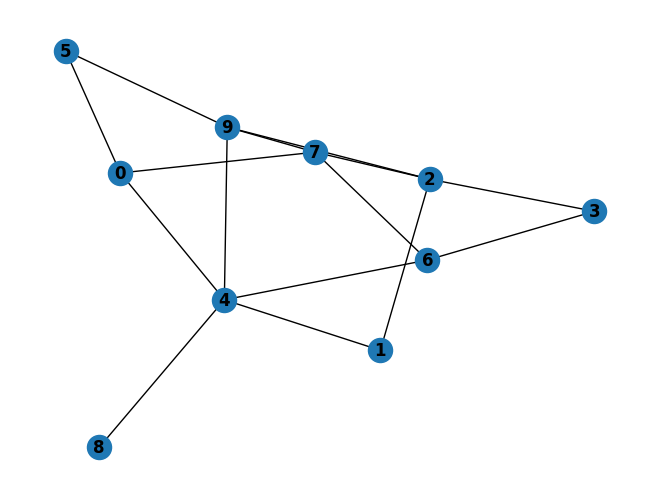

In [58]:
### Rappel du graphe (connexe) graphe_simple
nx.draw(graphe_simple, with_labels=True, font_weight='bold')

### Demnadez le même parcours (BFS) à newtworkX

In [59]:
edges = nx.bfs_edges(graphe_simple, 0)
list(edges)

[(0, 5), (0, 4), (0, 7), (5, 9), (4, 6), (4, 8), (4, 1), (7, 2), (6, 3)]

#### Pour aller plus loin, on définit **l'arbre** de BFS :

[0, 5, 4, 7, 9, 6, 8, 1, 2, 3]


[(0, 5), (0, 4), (0, 7), (5, 9), (4, 6), (4, 8), (4, 1), (7, 2), (6, 3)]

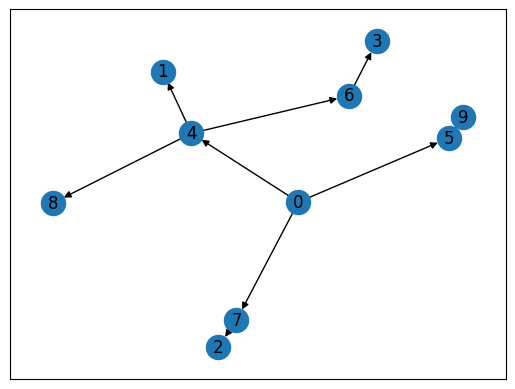

In [60]:
# Et l'arbre BFS

tree = nx.bfs_tree(graphe_simple, 0) 
print(list(tree))
list(tree.edges())
nx.draw_networkx(tree)

#### Succs et pred dans ce parcours

In [61]:
successors = nx.bfs_successors(graphe_simple,0) 
print(list(successors))

predecessors = nx.bfs_predecessors(graphe_simple,0) 
print(list(predecessors))

[(0, [5, 4, 7]), (5, [9]), (4, [6, 8, 1]), (7, [2]), (6, [3])]
[(5, 0), (4, 0), (7, 0), (9, 5), (6, 4), (8, 4), (1, 4), (2, 7), (3, 6)]


## VIII) Exercice 4
### VIII.a) 
Ecrivez une fonction `estBiparti` qui prend en paramètre un graphe `G` et retourne `True` si `G` est biparti et `False` sinon

### VIII.b) 
Modifiez la fonction pour qu'elle retourne un *certificat* de la réponse, c'est-à-dire :
- la bipartition de l'ensemble des sommets si `G` est biparti
- un cycle impair qui prouve que `G` n'est pas biparti, sinon

### VIII.a)    
La fonction estBiparti (et la fonction qui trouve les cycles)

In [62]:
def findCycle(tabParents, v, w):
    cycle = []
    stack = []
    x = v
    y = w
    while x != y:
        stack.append(x)
        cycle.append(y)
        x = tabParents[x]
        y = tabParents[y]

    stack.append(x)
    while stack:
        cycle.append(stack.pop(-1))
    cycle.append(w)
    return cycle

def estBiparti(G): 
    # On crée un tableau de couleurs pour tous les sommets
    # -1 si le sommet n'est pas exploré, sinon couleur 0 ou 1
    tabCouleurs = [-1] * G.number_of_nodes()    
    parent = [-1] * G.number_of_nodes()

    # On colorie le premier sommet
    sommetInitial = list(G.nodes())[0]
    tabCouleurs[sommetInitial] = 1
    
    # On utilise une file d'attente pour gérer l'ordre BFS
    file = []
    file.append(sommetInitial)
 
    # On effectue un parcours BFS
    while file:
        u = file.pop(0)

        # retourne False si on détecte une boucle (cycle de taille 1)
        if u in list(G.neighbors(u)):
            return False

        # on parcourt la liste des voisins de u
        for v in list(G.neighbors(u)):
            # premier cas : v n'a pas encore été visité
            if tabCouleurs[v] == -1:
                # on affecte la couleur alternée de u
                tabCouleurs[v] = 1 - tabCouleurs[u]
                file.append(v)
                parent[v] = u
            
            # Deuxième cas : si v a déjà été visité, et a la même couleur que u
            # => on a un cycle impair
            elif tabCouleurs[v] == tabCouleurs[u]:
                print("N'est pas Bipartie et le résultat de  findCycle = ", findCycle(parent, u, v))
                return False, u, v, tabCouleurs, parent

            # si v a été visité et n'a pas la même couleur que u, on n'a rien à faire

    # Si on arrive ici, tous les sommets ont été coloriés de manière alternée, donc G est biparti
    return True, [[i for i, x in enumerate(tabCouleurs) if x == 0], [i for i, x in enumerate(tabCouleurs) if x == 1]]

#### Test avec un graphe cyclique

N'est pas Bipartie et le résultat de  findCycle =  [3, 4, 0, 1, 2, 3]


('Résultats ', (False, 2, 3, [1, 0, 1, 1, 0], [-1, 0, 1, 4, 0]))

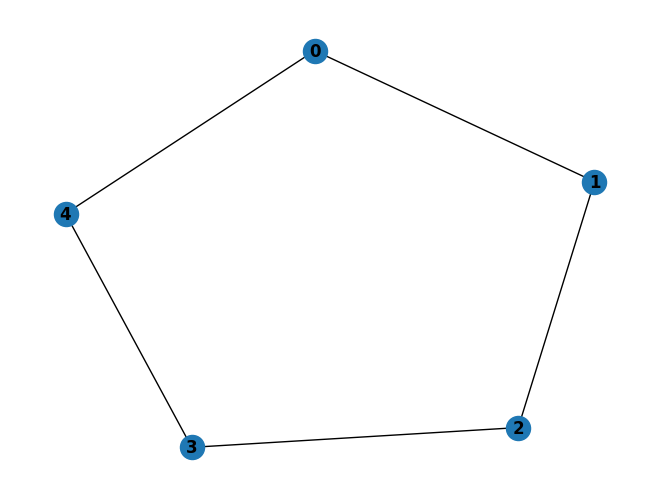

In [63]:
# On génère un graphe cyclique
G5 = nx.generators.classic.cycle_graph(5)
nx.draw(G5, with_labels=True, font_weight='bold')
"Résultats " , estBiparti(G5)

#### Donc, ce graphe n'est pas biparti.

### Et NetworkX sait le faire aussi !

In [64]:
from networkx.algorithms import bipartite
bipartite.is_bipartite(G5)

False

### Testons avec  un graphe biparti aléatoire généré

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8))

(True, [[4, 5, 6, 7, 8], [0, 1, 2, 3]])


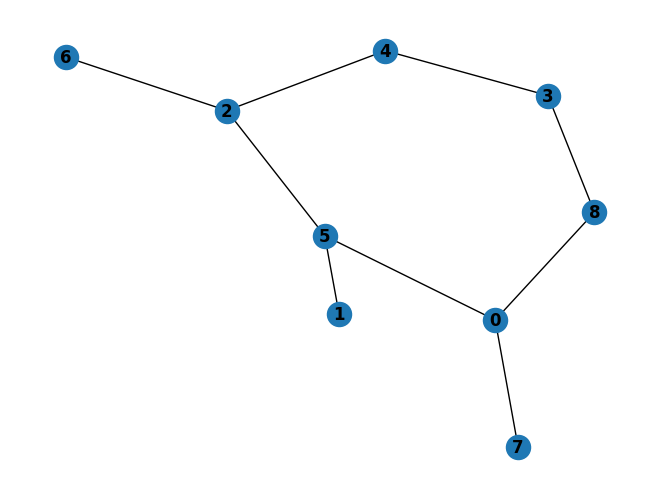

In [65]:
biparti_random = nx.algorithms.bipartite.generators.random_graph(4,5,0.6)
biparti_random.nodes
nx.draw(biparti_random, with_labels=True, font_weight='bold')
print(estBiparti(biparti_random))

### Que dit NetworkX ?

In [66]:
from networkx.algorithms import bipartite
bipartite.is_bipartite(biparti_random)

True

#### N.B. :  L'algorithme ci-dessus fonctionne <font color="red">(seulement) avec un graphe connexe</font>.      
Une des parties non connexe sera ignorée ! Mieux vaut d'abord tester si le graphe est connexe avant d'appeler la fonction.

#### N.B.  ne vous fiez pas au dessin, le graphe est bien biparti! Nous avons vu ci-dessus comment dessiner un grapge biparti pour bien "voir les 2 parties" !   
Pour ce faire, sur le graphe biparti généré (biparti_random), on peut récupérer les 2 ensembles de noeuds du graphe **biparti_random** ci-dessus.   
On peut récupérer les 2 ensembles de noeuds à l'aide de l'attribut **bipartite**  des noeuds :

In [67]:
ensemble_de_noeuds1 = {n for n, d in biparti_random.nodes(data=True) if d["bipartite"] == 0}
ensemble_de_noeuds2 = set(biparti_random) - ensemble_de_noeuds1
ensemble_de_noeuds1
ensemble_de_noeuds2

{0, 1, 2, 3}

{4, 5, 6, 7, 8}

### Demandons la même chose à NetworkX ! 

In [68]:
from networkx.algorithms import bipartite
bottom_nodes, top_nodes = bipartite.sets(biparti_random)
bottom_nodes, top_nodes

({0, 1, 2, 3}, {4, 5, 6, 7, 8})

Parfois, on doit récupérer les noeuds appartenant à chaque ensemble de noeuds pour pouvoir l'utiliser en argument de certains algorithmes qui l'exigent :
    ici on récupère la densité du graphe _biparti_random_ ci-dessus.

0.45

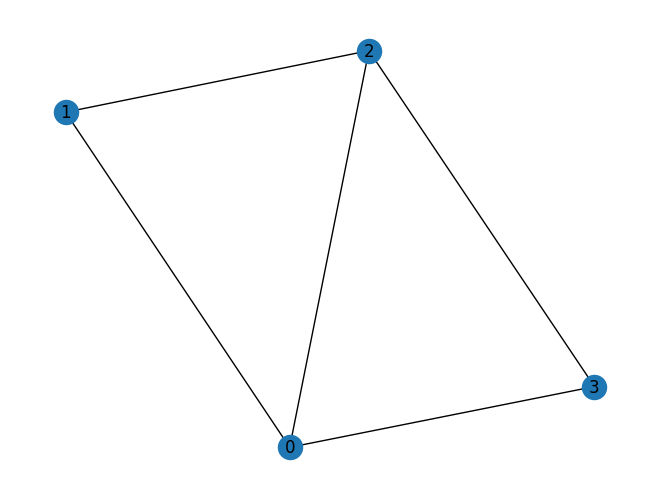

In [69]:
round(nx.algorithms.bipartite.density(biparti_random, ensemble_de_noeuds2), 2)

# Projection sur un ensemble de noeuds
biparti_random_projete = nx.algorithms.bipartite.projected_graph(biparti_random, ensemble_de_noeuds1)
nx.draw(biparti_random_projete, with_labels=True)

### VIII.a bis) Test de la fonction **estBiparti** sur  un graphe   **orienté**   
Nous avions créé **graphe_orieté** comme ceci :

In [70]:
### On reprend le grapge graphe_oriente du début de ce document
graphe_oriente = nx.DiGraph()  # Digraph : Directed Graph
graphe_oriente.add_edge(1, 2)  # Ajout d'une arête
graphe_oriente.add_edges_from([(1, 2),(1,3)]) # Ajout d'une liste d'arêtes
#nx.draw(graphe_oriente, with_labels=True)
# On ajoute d'autres éléments
graphe_oriente.add_node(5)
graphe_oriente.add_nodes_from([3,4]) # 3 y est déjà
graphe_oriente.add_edge(4, 5) # Cet ajout transforme graphe_oriente en non connexe

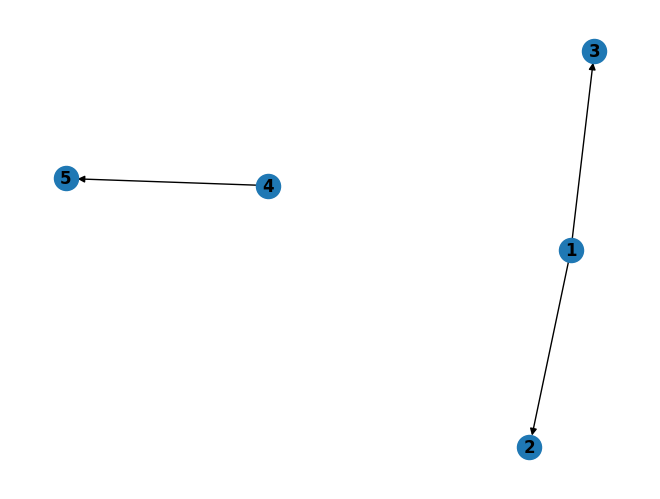

In [71]:
# Dessinons le graphe
nx.draw(graphe_oriente, with_labels=True, font_weight='bold')

### Voyons donc si ce graphe est biparti ?

In [72]:
print(estBiparti(graphe_oriente))

(True, [[2, 3], [1]])


### La réponse de NetworkX : 

In [73]:
from networkx.algorithms import bipartite
bipartite.is_bipartite(graphe_oriente)

True

### Sur un autre graphe, testons notre fonction puis demandons à Networkx la même chose. 

(True, [[4, 5, 6, 7, 8], [0, 1, 2, 3]])


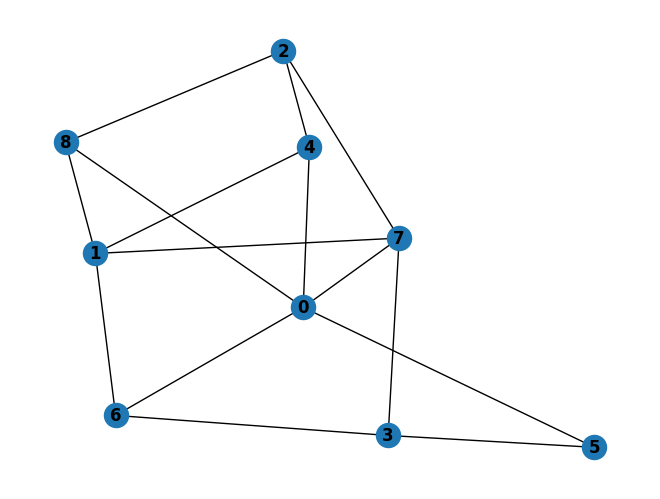

In [74]:
# Un autre test de biparti
graphe1_ = nx.algorithms.bipartite.generators.random_graph(4,5,0.6)
print(estBiparti(graphe1_))
nx.draw(graphe1_, with_labels=True, font_weight='bold')

### Demndons à NetworkX (les 2 réponses doivent concorder):

In [75]:
from networkx.algorithms import bipartite
bipartite.is_bipartite(graphe1_)

True

#### Un test utile avant des tester si un graphe est biparti est de savoir si le graphe est connexe !

In [76]:
nx.is_connected(graphe1_)

True

### Attention
**nx.is_connected(G)** <font color="red"> ne fonctionne pas sur un graphe orienté (Digraph)</font>

In [77]:
#nx.is_connected(graphe_oriente) #fait erreur : NetworkXNotImplemented: not implemented for directed type

NetworkXNotImplemented: not implemented for directed type

#### De même, pour un graphe non connexe, récupérer les biparti n'a pas de sens

In [78]:
# Fait erreur sur un  Disconnected graph: Ambiguous solution for bipartite sets.
# Ce n'est pas le cas ici à moins d'enlever une arête 
X1, Y1 = nx.bipartite.sets(graphe_oriente)
list(X1)
list(Y1)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

# IX) Exercice 5:

- a) Créer un graphe quelconque, par exemple watts par 

            votre_graphe=nx.watts_strogatz_graph(15 ,4 ,20) )
    
    Dessiner ce graphe
    
    Demander des infos par 
    
            print(nx.info(votre_graphe))
            
            
- b) Chercher dans la documentation comment appliquer l'algorithme de **Dijkstra** à ce graphe

    **Indications** : 
    - Appliquer Dijkstra entre 2 noeuds  par :
        nx.dijkstra_path(votre_graphe, 0, 10)
    - Obtenez la longueur de ce chemin par :
        nx.dijkstra_path_length(votre_graphe, 0, 10)
        
        
- C) Quel est l'effet de ceci sur votre_graphe ? (chercher à comprendre ce que fait cette fonction).    
import itertools    
print(list(itertools.combinations(votre_graphe.nodes(), 3))[:10])


### IX.a)

/tmp/ipykernel_3542/2431409369.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(votre_graphe))


Graph with 15 nodes and 30 edges


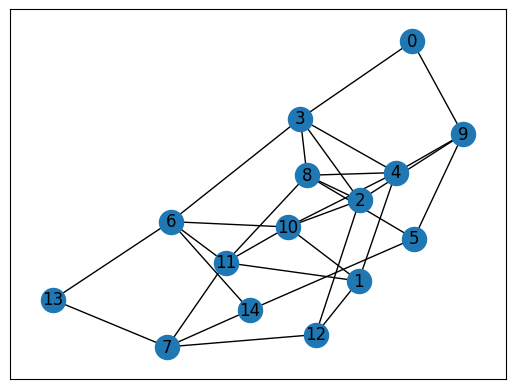

In [79]:
votre_graphe = nx.watts_strogatz_graph(15 ,4 ,20) 
nx.draw_networkx(votre_graphe)
print(nx.info(votre_graphe))

#### IX.b) A l'aide de NetworkX, **Dijkstra** du noeud 0 aux autres :

In [84]:
for n in votre_graphe.nodes :
    print(nx.dijkstra_path(votre_graphe, 0, n))

[0]
[0, 3, 4, 1]
[0, 3, 2]
[0, 3]
[0, 3, 4]
[0, 9, 5]
[0, 3, 6]
[0, 3, 6, 11, 7]
[0, 3, 8]
[0, 9]
[0, 3, 6, 10]
[0, 3, 6, 11]
[0, 3, 2, 12]
[0, 3, 6, 13]
[0, 3, 6, 14]


In [81]:
votre_graphe.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

In [82]:
import itertools
print(list(itertools.combinations(votre_graphe.nodes(), 3))[:10])
# print(list(itertools.combinations(votre_graphe.nodes(), 3)))

[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (0, 1, 8), (0, 1, 9), (0, 1, 10), (0, 1, 11)]


# X) Exercice 6:

## Problème du mariage stable à l'aide du graphe Matching  

Nopus avons vu en Cours 1 le problème du **mariage stable** : d'un coté les élèves (A,B,C,D) déclarent leurs préférences pour des annonces de stages et de l'autre côté, les entreprises (1,2,3,4) manifestent leurs intérêts divers pour les dossiers de ces élèves. Comment faire pour satisfaire les uns et les autres ?

N.B. : vous pouvez remplacer les "élèves" et les "entreprises" par d'autres groupes (filles et garçons, candidats et jobs, élèves 1A-ECL et les PEs-1A, ....).

On construit ci-dessous un graphe biparti (les élèves vs. les stages) et on dessine le graphe biparti  :

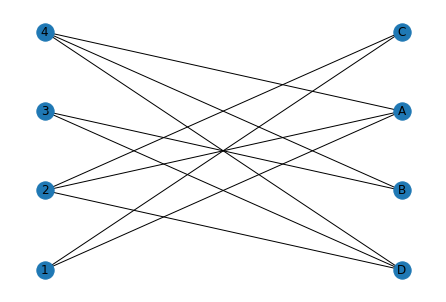

In [232]:
B = nx.Graph()  # Initialise graph
top_nodes = [1, 2,3,4]
bottom_nodes = ["A", "B", "C", "D"]
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "A"), (1, "C"), (2, "C"), (2, "A"), (2, "D")])
B.add_edges_from([(3, "B"), (3, "D"),  (4, "B"), (4, "A"), (4, "D")])
top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)
nx.draw(B, with_labels='True', pos=pos)


Dans ce graphe, chaque élèves / entreprise a exprimé différentes préférences (2 ou 3).

Ensuite, on demande à NetworkX (algorithme en annexe du cours 1) de satisfaire au maximum les 2 groupes.   
Pour ce faire, on demande un  **maximum cardinality matching**.

Le graphe ne comporte pas de pondération : chacun préfère l'autre au même degré ! Sinon, si chacun définit un "certain" degré d'intérêt pour l'autre, on peut trouver une solution satisfaisant le maximum des préférences.


Un matching ou ensemble d'arêtes indépendantes (independent edge set) dans un graphe non orienté est une ensemble d'arêtes sans noeud commun :

{1: 'A', 2: 'C', 3: 'B', 4: 'D', 'D': 4, 'B': 3, 'A': 1, 'C': 2}

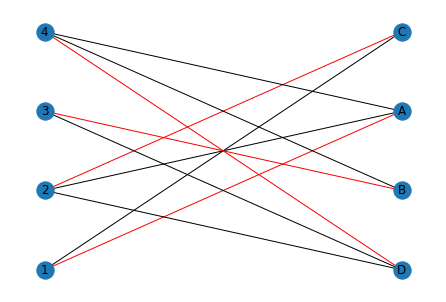

In [234]:
my_matching = nx.bipartite.matching.hopcroft_karp_matching(B, top_nodes)
my_matching

# repasser les couples établis en couleur rouge.
edges_of_matching=[(k,v) for k,v in my_matching.items()]
edge_colors = ["red" if edge in edges_of_matching else "black" for edge in B.edges()]
nx.draw(B, pos=pos, edge_color=edge_colors, with_labels=True)

La solution (signalée par les arêtes rouges) nou dit qui gagne quoi !   
L'élèves No 1 ira au stage A, 2 ira à C, 3 ira à B et 4 à D.   
 

# XI) Exercice 7:

Coder l'algorithme **A_star** à  un graphe de Petersen.

Voir la doc de NetworkX :    
    **astar_path(G, source, target, heuristic=None, weight='weight')**

## XI) Addendum

### XI. 1 - Création d'un autre graphe non orienté  biparti

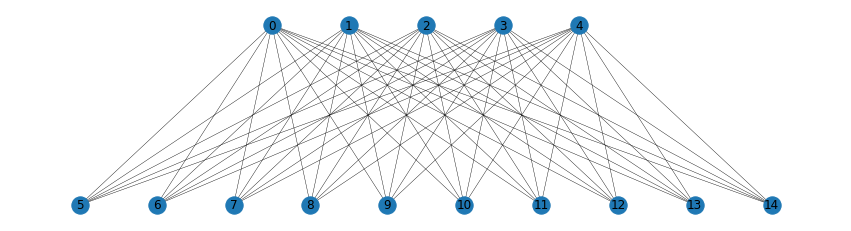

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

m, n = 5, 10
Grf = nx.complete_bipartite_graph(m, n)
pos = {}
pos.update((i, (i - m/2, 1)) for i in range(m))
pos.update((i, (i - m - n/2, 0)) for i in range(m, m + n))

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
nx.draw(Grf, with_labels=True, pos=pos, node_size=300, width=0.4)
#plt.show()

On renomme les noeuds du graphe : on remplace les nombres par des lettres

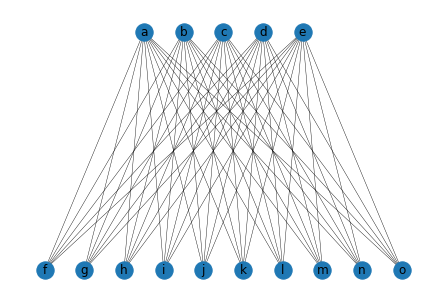

In [68]:
import string
mapping = dict(zip(Grf, string.ascii_lowercase))
Grf = nx.relabel_nodes(Grf, mapping)
S=sorted(Grf)
pos.update((S[i], (i - m/2, 1)) for i in range(m))
pos.update((S[i], (i - m - n/2, 0)) for i in range(m, m + n))
nx.draw(Grf, with_labels=True, pos=pos, node_size=300, width=0.4)

### XI. 2 - Encore un exemple de création d'un autre graphe non orienté  biparti

{1: 'A', 2: 'D', 'D': 2, 'A': 1}

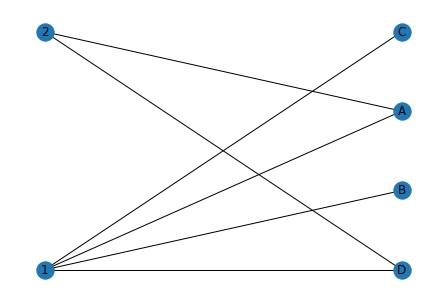

In [69]:
B = nx.Graph()  # Initialise graph
top_nodes = [1, 2]
bottom_nodes = ["A", "B", "C", "D"]
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "A"), (1, "B"), (1, "C"), (1, "D"), (2, "A"), (2, "D")])
top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)
nx.draw(B, with_labels='True', pos=pos)
#Obtain the maximum cardinality matching
# A matching or independent edge set in an undirected graph is a set of edges without common vertices.
my_matching = nx.bipartite.matching.hopcroft_karp_matching(B, top_nodes)
my_matching